# Math Computational Methods
MCM is a [Mathematical Physics](https://www.edx.org/learn/math/georgetown-university-mathematical-and-computational-methods) course used as the math foundation of Quantum Mechanics. 

The power of output <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/outputpower.png" alt="vector_cal" width="300">

Physics is naturally speaking math. 

### CM

Classical Mechanics - Newton, Lagrange, Hamilton/Noether

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/physics_roadmap.jpg" alt="vector_cal" width="500">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/CM_3ppl.PNG" alt="vector_cal" width="350">
<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/hamilton_emc2.jpg" alt="vector_cal" width="350">


In [3]:
#Comparison of Newton, Lagrange, and Hamilton Mechanics, use Harmonic Oscillator (mass-spring system) as an Example
from sage.all import *
import matplotlib.pyplot as plt
import numpy as np

print("HARMONIC OSCILLATOR: Three Formulations of Classical Mechanics")
print()
# Define symbolic variables
t = var('t')  # time
x = function('x')(t)  # position as function of time
v = function('v')(t)  # velocity
p = function('p')(t)  # momentum

# System parameters
m_val = 1.0  # mass (kg)
k_val = 4.0  # spring constant (N/m)
omega_val = sqrt(k_val/m_val)  # angular frequency

print(f"System Parameters:")
print(f"  Mass m = {m_val} kg")
print(f"  Spring constant k = {k_val} N/m")
print(f"  Natural frequency ω = {omega_val} rad/s")
print()

# Initial conditions
x0 = 1.0  # initial position (m)
v0 = 0.0  # initial velocity (m/s)

print(f"Initial Conditions:")
print(f"  x(0) = {x0} m")
print(f"  v(0) = {v0} m/s")
print()

# 1. NEWTONIAN MECHANICS
# =============================================================================
print("="*70)
print("1. NEWTONIAN MECHANICS")
print("="*70)
print()
print("Newton's Second Law: F = ma")
print("For a harmonic oscillator: F = -kx")
print()

# Define symbolic variables for Newton's approach
m, k = var('m k'); assume(m > 0); assume(k > 0)
x_sym = function('x')(t)

F = -k * x_sym  # Force on the mass
newton_eom = m * diff(x_sym, t, 2) == F  # Newton's second law: F = m * a = m * d²x/dt²

print("Equation of Motion (Newton):")
show(newton_eom)
print()

# Solve the differential equation
print("Solving the differential equation...")
newton_solution = desolve(newton_eom.rhs()/m == newton_eom.lhs()/m, 
                          x_sym,  ivar=t,  ics=[0, x0, v0])

# Substitute numerical values
newton_solution_num = newton_solution.substitute(m=m_val, k=k_val)

print("General Solution:")
print(f"  x(t) = {newton_solution_num}")
print()

HARMONIC OSCILLATOR: Three Formulations of Classical Mechanics

System Parameters:
  Mass m = 1.00000000000000 kg
  Spring constant k = 4.00000000000000 N/m
  Natural frequency ω = 2.00000000000000 rad/s

Initial Conditions:
  x(0) = 1.00000000000000 m
  v(0) = 0.000000000000000 m/s

1. NEWTONIAN MECHANICS

Newton's Second Law: F = ma
For a harmonic oscillator: F = -kx

Equation of Motion (Newton):


m*diff(x(t), t, t) == -k*x(t)


Solving the differential equation...
General Solution:
  x(t) = cos(2.00000000000000*t)



In [ ]:
print("2. LAGRANGIAN MECHANICS")
print("="*70)
print("Based on the Lagrangian L = T - V")
print("where T is kinetic energy and V is potential energy")
print()

# Define generalized coordinate
q = function('q')(t)
# Velocity (we'll treat this symbolically)
v = diff(q, t)

# Kinetic energy T = (1/2)mv²
T_expr = (1/2) * m * v^2
print("Kinetic Energy:", f"  T = (1/2)m(dq/dt)²")
print()

# Potential energy V = (1/2)kx²
V_expr = (1/2) * k * q^2
print("Potential Energy:", f"  V = (1/2)kq²")
print()

# Lagrangian L = T - V
print("Lagrangian:", f"  L = T - V = (1/2)m(dq/dt)² - (1/2)kq²")
print()

# Euler-Lagrange equation: d/dt(∂L/∂q̇) - ∂L/∂q = 0
print("Euler-Lagrange Equation: d/dt(∂L/∂q̇) - ∂L/∂q = 0")
print()

print("Step-by-step derivation:")
print(f"  ∂L/∂q̇ = ∂/∂q̇[(1/2)m(q̇)² - (1/2)kq²] = mq̇")
print()
print(f"  d/dt(∂L/∂q̇) = d/dt(mq̇) = mq̈")
print()
print(f"  ∂L/∂q = ∂/∂q[(1/2)m(q̇)² - (1/2)kq²] = -kq")
print()

print("Euler-Lagrange equation becomes:")
print(f"  mq̈ - (-kq) = 0")
print(f"  mq̈ + kq = 0")
print(f"  q̈ + (k/m)q = 0")
print()

print("This is IDENTICAL to Newton's equation!")
print()

2. LAGRANGIAN MECHANICS
Based on the Lagrangian L = T - V
where T is kinetic energy and V is potential energy

Kinetic Energy:   T = (1/2)m(dq/dt)²

Potential Energy:   V = (1/2)kq²

Lagrangian:   L = T - V = (1/2)m(dq/dt)² - (1/2)kq²

Euler-Lagrange Equation: d/dt(∂L/∂q̇) - ∂L/∂q = 0

Step-by-step derivation:
  ∂L/∂q̇ = ∂/∂q̇[(1/2)m(q̇)² - (1/2)kq²] = mq̇

  d/dt(∂L/∂q̇) = d/dt(mq̇) = mq̈

  ∂L/∂q = ∂/∂q[(1/2)m(q̇)² - (1/2)kq²] = -kq

Euler-Lagrange equation becomes:
  mq̈ - (-kq) = 0
  mq̈ + kq = 0
  q̈ + (k/m)q = 0

This is IDENTICAL to Newton's equation!



In [ ]:
print("3. HAMILTONIAN MECHANICS")
print("="*70)
print("Based on the Hamiltonian H(q,p) = T + V")
print("Uses canonical coordinates (q, p) where p is conjugate momentum")
print()

# Canonical variables
q_var = var('q_var')  # position
p_var = var('p_var')  # momentum

# Conjugate momentum: p = ∂L/∂q̇ = mq̇
print("Conjugate Momentum:")
print(f"  p = ∂L/∂q̇ = m·dq/dt = mv")
print()

# Hamiltonian: H = T + V
# Express T in terms of momentum: T = p²/(2m)
T_hamilton = p_var^2 / (2*m)
V_hamilton = (1/2) * k * q_var^2

H = T_hamilton + V_hamilton

print(f"Hamiltonian (Total Energy):")
print(f"  H(q,p) = p²/(2m) + (1/2)kq²")
print()

# Hamilton's canonical equations
print("Hamilton's Canonical Equations:")
print()

# dq/dt = ∂H/∂p
dH_dp = diff(H, p_var)
print(f"  dq/dt = ∂H/∂p = p/m")
print()

# dp/dt = -∂H/∂q
dH_dq = diff(H, q_var)
print(f"  dp/dt = -∂H/∂q = -kq")
print()

print("This gives us a system of two first-order ODEs:")
print(f"  dq/dt = p/m")
print(f"  dp/dt = -kq")
print()

print("Eliminating p: differentiate first equation and substitute second:")
print(f"  d²q/dt² = (1/m)·dp/dt = (1/m)·(-kq) = -(k/m)q")
print(f"  d²q/dt² + (k/m)q = 0")
print()

print("Again, IDENTICAL to Newton's and Lagrange's equations!")

3. HAMILTONIAN MECHANICS

Based on the Hamiltonian H(q,p) = T + V
Uses canonical coordinates (q, p) where p is conjugate momentum

Conjugate Momentum:
  p = ∂L/∂q̇ = m·dq/dt = mv

Hamiltonian (Total Energy):
  H(q,p) = p²/(2m) + (1/2)kq²

Hamilton's Canonical Equations:

  dq/dt = ∂H/∂p = p/m

  dp/dt = -∂H/∂q = -kq

This gives us a system of two first-order ODEs:
  dq/dt = p/m
  dp/dt = -kq

Eliminating p: differentiate first equation and substitute second:
  d²q/dt² = (1/m)·dp/dt = (1/m)·(-kq) = -(k/m)q
  d²q/dt² + (k/m)q = 0

Again, IDENTICAL to Newton's and Lagrange's equations!



4. NUMERICAL SOLUTIONS AND VISUALIZATION

✓ Visualization saved: harmonic_oscillator_comparison.png

5. SUMMARY COMPARISON


╔═════════════════════╦══════════════════════════════════════════════════════╗
║ Formulation         ║ Key Characteristics                                  ║
╠═════════════════════╬══════════════════════════════════════════════════════╣
║ NEWTONIAN           ║ • Uses forces and accelerations                      ║
║                     ║ • Second-order ODE: F = ma                           ║
║                     ║ • Direct and intuitive                               ║
║                     ║ • Equation: mẍ + kx = 0                             ║
║                     ║ • Variables: position x(t)                           ║
╠═════════════════════╬══════════════════════════════════════════════════════╣
║ LAGRANGIAN          ║ • Uses energy difference (L = T - V)                 ║
║                     ║ • Generalized coordinates                            ║
║      

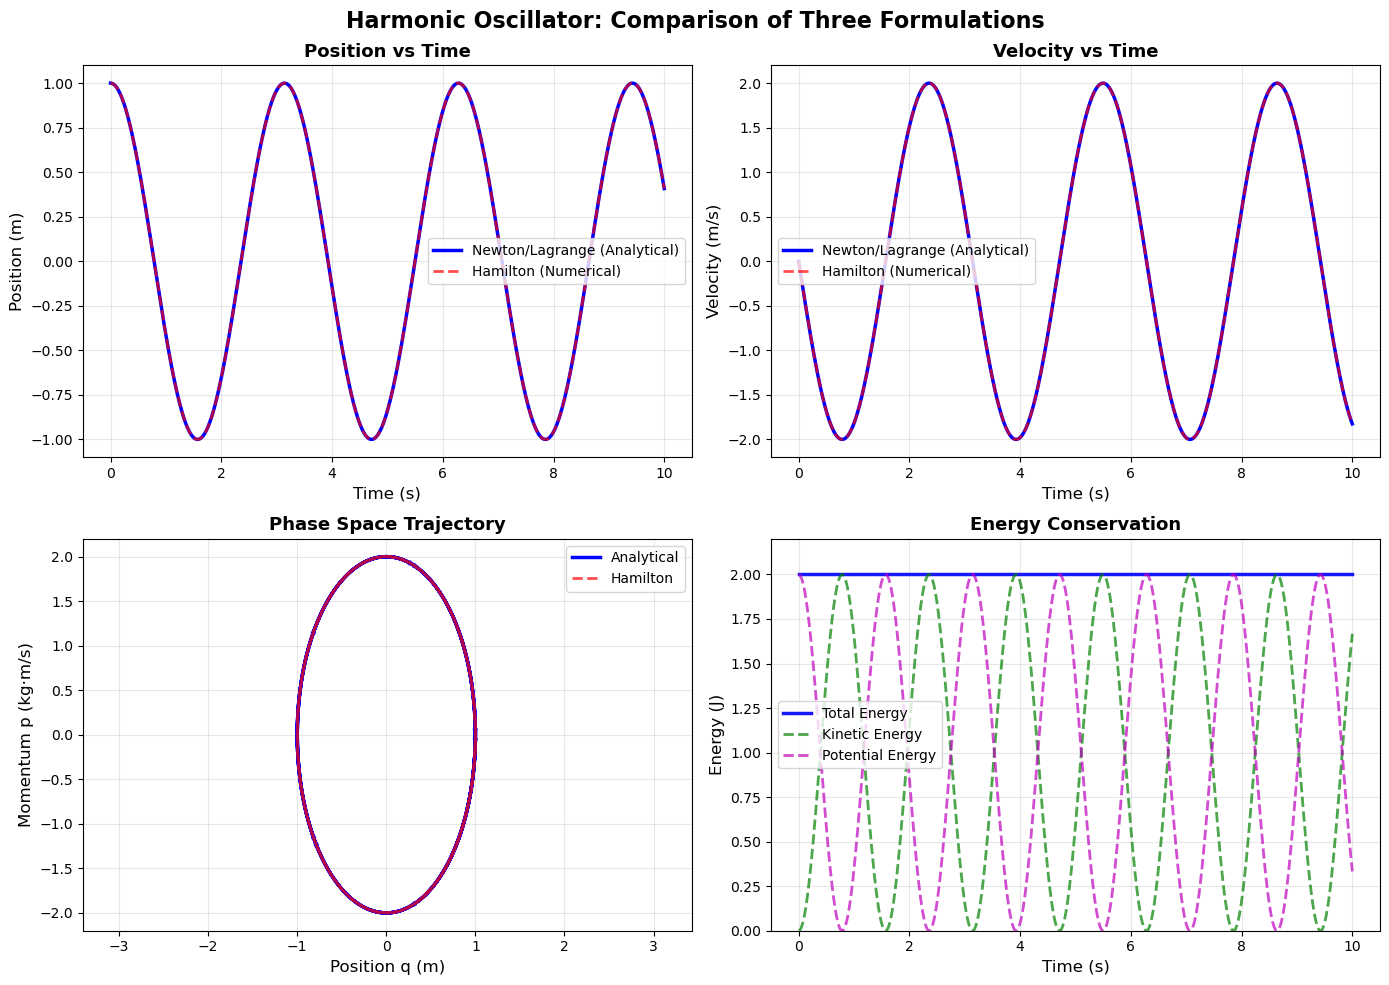

In [10]:
print("4. NUMERICAL SOLUTIONS AND VISUALIZATION")
print("="*70)
print()

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Time array
t_array = np.linspace(0, 10, 1000)

# Analytical solution (Newton/Lagrange)
omega_num = np.sqrt(k_val/m_val)
x_analytical = x0 * np.cos(omega_num * t_array) + (v0/omega_num) * np.sin(omega_num * t_array)
v_analytical = -x0 * omega_num * np.sin(omega_num * t_array) + v0 * np.cos(omega_num * t_array)

# Hamilton's equations (numerical solution)
def hamilton_system(state, t):
    """
    Hamilton's equations for harmonic oscillator
    state = [q, p]
    """
    q, p = state
    dq_dt = p / m_val
    dp_dt = -k_val * q
    return [dq_dt, dp_dt]

# Initial state [position, momentum]
initial_state = [x0, m_val * v0]

# Solve Hamilton's equations
hamilton_solution = odeint(hamilton_system, initial_state, t_array)
q_hamilton = hamilton_solution[:, 0]
p_hamilton = hamilton_solution[:, 1]
v_hamilton = p_hamilton / m_val

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Harmonic Oscillator: Comparison of Three Formulations', 
             fontsize=16, fontweight='bold')

# Plot 1: Position vs Time
ax1 = axes[0, 0]
ax1.plot(t_array, x_analytical, 'b-', linewidth=2.5, label='Newton/Lagrange (Analytical)')
ax1.plot(t_array, q_hamilton, 'r--', linewidth=2, label='Hamilton (Numerical)', alpha=0.7)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Position (m)', fontsize=12)
ax1.set_title('Position vs Time', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Plot 2: Velocity vs Time
ax2 = axes[0, 1]
ax2.plot(t_array, v_analytical, 'b-', linewidth=2.5, label='Newton/Lagrange (Analytical)')
ax2.plot(t_array, v_hamilton, 'r--', linewidth=2, label='Hamilton (Numerical)', alpha=0.7)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Velocity (m/s)', fontsize=12)
ax2.set_title('Velocity vs Time', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

# Plot 3: Phase Space (Position vs Momentum)
ax3 = axes[1, 0]
ax3.plot(x_analytical, m_val * v_analytical, 'b-', linewidth=2.5, label='Analytical')
ax3.plot(q_hamilton, p_hamilton, 'r--', linewidth=2, label='Hamilton', alpha=0.7)
ax3.set_xlabel('Position q (m)', fontsize=12)
ax3.set_ylabel('Momentum p (kg·m/s)', fontsize=12)
ax3.set_title('Phase Space Trajectory', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=10)
ax3.axis('equal')

# Add arrows to show direction
n_arrows = 8
for i in range(0, len(t_array), len(t_array)//n_arrows):
    if i < len(t_array) - 1:
        dx = x_analytical[i+1] - x_analytical[i]
        dp = m_val*v_analytical[i+1] - m_val*v_analytical[i]
        ax3.arrow(x_analytical[i], m_val*v_analytical[i], dx, dp, 
                 head_width=0.05, head_length=0.08, fc='blue', ec='blue', alpha=0.6)

# Plot 4: Energy Conservation
ax4 = axes[1, 1]
# Calculate energies
KE_analytical = 0.5 * m_val * v_analytical**2
PE_analytical = 0.5 * k_val * x_analytical**2
E_analytical = KE_analytical + PE_analytical

KE_hamilton = p_hamilton**2 / (2 * m_val)
PE_hamilton = 0.5 * k_val * q_hamilton**2
E_hamilton = KE_hamilton + PE_hamilton

ax4.plot(t_array, E_analytical, 'b-', linewidth=2.5, label='Total Energy', alpha=0.9)
ax4.plot(t_array, KE_analytical, 'g--', linewidth=2, label='Kinetic Energy', alpha=0.7)
ax4.plot(t_array, PE_analytical, 'm--', linewidth=2, label='Potential Energy', alpha=0.7)
ax4.set_xlabel('Time (s)', fontsize=12)
ax4.set_ylabel('Energy (J)', fontsize=12)
ax4.set_title('Energy Conservation', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=10)
ax4.set_ylim([0, max(E_analytical)*1.1])

plt.tight_layout()
plt.savefig('/home/tom/Desktop/harmonic_oscillator_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved: harmonic_oscillator_comparison.png")
print()

# =============================================================================
# COMPARISON TABLE
# =============================================================================
print("="*70)
print("5. SUMMARY COMPARISON")
print("="*70)
print()

comparison_table = """
╔═════════════════════╦══════════════════════════════════════════════════════╗
║ Formulation         ║ Key Characteristics                                  ║
╠═════════════════════╬══════════════════════════════════════════════════════╣
║ NEWTONIAN           ║ • Uses forces and accelerations                      ║
║                     ║ • Second-order ODE: F = ma                           ║
║                     ║ • Direct and intuitive                               ║
║                     ║ • Equation: mẍ + kx = 0                             ║
║                     ║ • Variables: position x(t)                           ║
╠═════════════════════╬══════════════════════════════════════════════════════╣
║ LAGRANGIAN          ║ • Uses energy difference (L = T - V)                 ║
║                     ║ • Generalized coordinates                            ║
║                     ║ • Euler-Lagrange equation                            ║
║                     ║ • Powerful for constrained systems                   ║
║                     ║ • Equation: d/dt(∂L/∂q̇) - ∂L/∂q = 0                ║
║                     ║ • Variables: position q(t), velocity q̇(t)           ║
╠═════════════════════╬══════════════════════════════════════════════════════╣
║ HAMILTONIAN         ║ • Uses total energy (H = T + V)                      ║
║                     ║ • Phase space (q, p)                                 ║
║                     ║ • Two first-order ODEs (canonical equations)         ║
║                     ║ • Equations: q̇ = ∂H/∂p, ṗ = -∂H/∂q                  ║
║                     ║ • Foundation for statistical & quantum mechanics     ║
║                     ║ • Variables: position q(t), momentum p(t)            ║
╚═════════════════════╩══════════════════════════════════════════════════════╝
"""

print(comparison_table)
print()

print("Key Insights:")
print()
print("  1. EQUIVALENCE: All three formulations predict identical motion")
print()
print("  2. NEWTON: Most direct for simple systems with known forces")
print("     → Best when forces are explicit")
print()
print("  3. LAGRANGE: Powerful for complex systems with constraints")
print("     → Automatically handles constraint forces")
print("     → Coordinate-independent formulation")
print()
print("  4. HAMILTON: Emphasizes conservation laws and symmetries")
print("     → Phase space provides complete system description")
print("     → Natural framework for statistical mechanics")
print("     → Direct path to quantum mechanics (→ Schrödinger equation)")
print()
print("  5. ADVANTAGES:")
print("     • Newton: Intuitive, direct")
print("     • Lagrange: Elegant, handles constraints naturally")
print("     • Hamilton: Reveals conservation laws, generalizes easily")
print()

# Calculate accuracy
error_position = np.max(np.abs(x_analytical - q_hamilton))
error_velocity = np.max(np.abs(v_analytical - v_hamilton))
error_energy = np.max(np.abs(E_analytical - E_hamilton))

print("Numerical Accuracy (Hamilton vs Analytical):")
print(f"  Max position error:  {error_position:.2e} m")
print(f"  Max velocity error:  {error_velocity:.2e} m/s")
print(f"  Max energy error:    {error_energy:.2e} J")
print(f"  Energy conservation: {(1 - error_energy/E_analytical[0])*100:.6f}%")
print()

print("="*70)
print("DEMONSTRATION COMPLETE")
print("="*70)
print()
print("The harmonic oscillator demonstrates that Newton, Lagrange, and")
print("Hamilton mechanics are equivalent but offer different perspectives")
print("and computational advantages depending on the problem at hand.")

Lagrangian Mechanics
- Analytical mechanics is fundamental for someone interested in theoretical physics.
- In CM, QM, QFT, and the standard model, you will not find forces and vectors.
- General intro to Lagrangian mechanics
    - Imagine a mechanical system that evolves from some configuration at time $t_1$ to some other configuration at time $t_2$.
    - The goal of mechanics is to find the trajectory of this curve, which is normally done by solving Newton's second law $F=m\ddot{\vec q}$.
    - The alternative method is to denote the trajectory as $q(t)$ and adding a small variation $\delta q$ to it and making the system satisfy the principle of least action.
    - Action: $S[q(t)]=\int_{t_1}^{t_2}Ldt$
    - Lagrangian: $L=K-U$
        - $K$: Kinetic energy
        - $U$: potential energy
    - Principle: $\delta S=S[q(t)+\delta q]-S[q(t)]=0$
    - Normally, there is no explanation for why the Lagrangian should be the kinetic energy minus the potential energy or why the action is defined with a time integral.
- Development of Lagrangian mechanics
    - Newton's second law for multiple particles: $\sum_{k=1}^nm_k\ddot{\vec q}_k=\sum_{k=1}^n\vec F_k$
    - Rearrange: $\sum_{k=1}^n(m_k\ddot{\vec q}-\vec F_k)=0$
    - Now we introduce an infinitesimal variation that vanish at the initial and final points.
    - Project along variation to eliminate vectors: $\sum_{k=1}^n(m_k\ddot{\vec q}-\vec F_k)\cdot\delta\vec q_k=0$
    - The left hand side is called virtual work and the equation is referred to as d'Alembert principle.
    - Manipulate into Euler-Lagrange equation: $\large\frac d{dt}(\frac{\delta K}{\delta\dot{q_k}})-\frac{\delta K}{\delta q_k}+\frac{\delta U}{\delta q_k}$
    - Expand d'Alembert principle: $\sum_{k=1}^n\vec F_k\cdot\delta\vec q_k=\sum_{k=1}^nm_k\ddot{\vec q_k}\cdot\delta\vec q_k$
    - On the left hand side, we consider the work done by conservative forces which are independent of the trajectory.
    - Harmonic Oscillator
        - Potential energy: $U(x)=\frac12kx^2
        - Force: $\vec F(x)=-k\vec x$
        - Express force in terms of potential energy: $\vec F(x)=-\nabla U(x)$
    - Positive test charge(charge $q$ at distance $x$) near positively charged object(charge $Q$)
        - Potential energy: $U(x)=\frac{kQq}x$
        - Force: $\vec F(x)=\frac{kQq}{x^2}\hat x$
        - Express force in terms of potential energy: $\vec F(x)=-\nabla U(x)$
    - In general, $\vec F(x)=-\nabla U(x)$ and this is also why there is a minus sign in the Lagrangian.
    - $\vec F(x)=-\nabla U(x)\rightarrow\vec F_k\cdot\delta\vec q=-\delta U$
    - Left hand side: $-\sum_{k=1}^n\delta U_k$
    - Use trick to rewrite derivative: $\ddot q\delta q=\frac d{dt}(\dot q\delta q)-\dot q\delta\dot q=\frac d{dt}(\dot q\delta q)-\frac12\delta(\dot q^2)$
    - Equation: $-\sum_{k=1}^n\delta U_k=\sum_{k=1}^nm_k\frac d{dt}(\ddot{\vec q_k}\cdot\delta\vec q_k)-\frac12\sum_{k=1}^nm_k\delta(|\dot{\vec q_k}|^2)$
    - Substitute potential and kinetic energy: $\delta(K-U)=\frac d{dt}\sum_{k=1}^nm_k\ddot{\vec q_k}\cdot\delta\vec q_k$
    - Time integral: $\delta\int_{t_1}^{t_2}(K-U)dt=\int_{t_1}^{t_2}\frac d{dt}\sum_{k=1}^nm_k\ddot{\vec q_k}\cdot\delta\vec q_kdt$
    - Use fundamental theorem of calculus on RHS: $\sum_{k=1}^nm_k\ddot{\vec q_k}\cdot\delta\vec q_k|_{t_1}^{t_2}$
    - But the variation vanishes at the initial and final times so the RHS is just 0.
    - Hamilton's principle: $\delta\int_{t_1}^{t_2}(K-U)dt=0$
- Stuff to do with Lagrangian
    - Euler-Lagrange equation: $\frac d{dt}(\frac{\delta L}{\delta\dot q_k})-\frac{\delta L}{\delta q_k}=0$
    - 1D Harmonic Oscillator
        - Kinetic energy: $K=\frac12m\dot x^2$
        - Potential energy: $U=\frac12kx^2$
        - Lagrangian: $L=\frac12m\dot x^2-\frac12kx^2$
        - Use Euler-Lagrange: $\frac{\delta L}{\delta\dot x}=m\dot x$
            - This is linear momentum($p=mv$).
        - $\frac{\delta L}{\delta x}=-kx$
        - $\frac d{dt}(m\dot x)-(-kx)=0$
        - Equation for harmonic motion: $m\ddot x+kx=0$
    - Kepler's problem
        - Kinetic energy: $K=\frac12m(\dot r^2+r^2\dot \phi^2)$
        - Potential energy: $U=U(r)$(only depends on the radius)
        - Lagrangian: $L=\frac12m\dot r^2+\frac12mr^2\dot \phi^2-U(r)$
        - $m\ddot r=mr\dot \phi^2+F(r)$
        - $\frac{\delta L}{\delta\dot \phi}=mr^2\dot \phi=l$
            - The $l$ on the right hand side comes from the fact that $mr^2\dot \phi$ is the angular momentum.
        - $\frac{\delta L}{\delta\phi}=0$
            - This is because the potential energy is central, meaning that it only depends on the radius.
        - This also tells us that the derivative of the angular momentum is 0, or that it is a constant. In other words, angular momentum in conserved.
    - All of these can be done with Newtonian mechanics except that it is much simpler, but there are also some extra features to Lagrangian mechanics.
    - The fact that we found the momentum when we to the derivative with respect to position is not a coincidence but is instead a general result.
    - Conjugate momentum: $\frac{\delta L}{\delta\dot q_k}\equiv p_k$
    - In both the Bohr-Sommerfeld rule and the canonical commutation relations, we can still find the conjugate momentum.
    - Rewritten Euler-Lagrange: $\frac{dp_k}{dt}=\frac{\delta L}{\delta q_k}$
    - If a coordinate is cyclic($\frac{\delta L}{\delta q_k}=0$), then $\frac{dp_k}{dt}=0$, which means the conjugate momentum is constant.
    - We saw this earlier when the potential energy of Kepler's problem only depended on the radius, which caused the angular momentum to be a constant.

Hamiltonian Mechanics
- Kinetic energy in terms of position and speed: $\large K=K(q,\dot q)$
- $\large dK=\sum_k(\frac{\delta K}{\delta q_k}dq_k+\frac{\delta K}{\delta\dot q_k}d\dot q_k)$
- $\large K=\frac12\sum_km_k\dot q_k^2$
- $\large\frac{\delta K}{\delta\dot q_k}=m_k\dot q_k$
- $\large2K=\sum_k\dot q_k\frac{\delta K}{\delta\dot q_k}$
- $\large2dK=\sum_k(d\dot q_k\frac{\delta K}{\delta\dot q_k}+\dot q_kd(\frac{\delta K}{\delta\dot q_k}))$
- Take difference of $2dK$ and $dK$: $\large dK=\sum_k(\dot q_kd(\frac{\delta K}{\delta\dot q_k})-dq_k\frac{\delta K}{\delta q_k})$
- There is a relation that relates $p_k to $\dot q_k$. Hamilton inverted this to convert the kinetic energy to $\tilde K(q,p)=K(q,\dot q(p_k))$.
- $\large d\tilde K=\sum_k(\dot q_k(p_k)dp_k-\frac{\delta K}{\delta q_k}dq_k)$
- $\large\frac{\delta\tilde K}{\delta p_k}=\dot q_k$
- $\large\frac{\delta\tilde K}{\delta q_k}=-\frac{\delta K}{\delta q_k}$
- We add 0 to the first of the two last equation to find $\dot q_k=\frac\delta{\delta p_k}(\tilde K+U)$
- $\dot p_k=\frac{\delta L}{\delta q_k}=\frac{\delta K}{\delta q_k}-\frac{\delta U}{\delta q_k}=-\frac{\delta\tilde K}{\delta q_k}-\frac{\delta U}{\delta q_k}=-\frac\delta{\delta q_k}(\tilde K+U)$
- At the very end, we substitute $H=\tilde K+U$ where $H$ is the Hamiltonian.
- $\dot p_k=-\frac{\delta H}{\delta q_k}$
- Hamiltonian: $H=\tilde K+U$
- Euler's homogeneous function theorem: $\tilde L(q,\dot q(p),t)+H(q,p,t)=2\tilde K(q,p)=\sum_k\dot q_k\frac{\delta K}{\delta\dot q_k}=\sum_kp_k\dot q_k(p_k)$
- Hamiltonian in terms of Lagrangian(This is the Legendre transform of the Lagrangian): $H(q,p,t)=\sum_kp_k\dot q_k(p_k)-\tilde L(q,\dot(p),t)$
- $S[q,p]=\int_{t_1}^{t_2}(\sum_kp_k\dot q_k-H(q,p,t))dt$
- Variation: $\delta S=\int_{t_1}^{t_2}\sum_k((\dot q_k-\frac{\delta H}{\delta p_k})\delta p_k-(\dot p_k+\frac{\delta H}{\delta q_k}\delta))=0$
- It shouldn't be much of a surprise that the variation is 0 because Hamilton's canonical equations say that the two bracketed sections are both 0 and are the same equations from earlier.
- This is the formalism of Hamiltonian mechanics. Instead of a 2nd-order DE per degree of freedom, there are two 1st-order DEs to solve.

## Calculus 

### Review

- The essential of Calculus is how God building this world
- [Euler Solution to Basel Problem](https://www.tungsteno.io/post/exa-basel_problem_euler_sinus_product) Euler used infinite products that is similar to Taylor expansion

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/seriesgraph.png" alt="seriesgraph" width="550">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/wks-of-fetal.png" alt="fetalwks" width="550">


<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/EngMath_Sequence_01
.png" alt="fetalwks" width="650">
<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/EngMath_Series_01.png" alt="fetalwks" width="650">
<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/EngMath_Series_02.png" alt="fetalwks" width="550">


The difference between Taylor series and MacLaurin series: 
- Taylor series can be expanded at any $x$ and are more generalized
- Maclaurin series are always expanded at $x= 0$

Ten Important Identities
1. The quadratic equation : $ax^2+bx+c$ has 2 roots $r=\large\frac{-b\pm\sqrt{b^2-4ac}}{2a}$
1. Fundamental trigonometric identity : $\cos^2{\theta}+\sin^2{\theta}=1$
1. Trigonometric Definitions : $\sec{\theta}=\frac{1}{\cos{\theta}}\quad\tan{\theta}=\frac{\sin{\theta}}{\cos{\theta}}\quad\csc{\theta}=\frac{1}{\sin{\theta}}\quad\cot{\theta}=\frac{\cos{\theta}}{\sin{\theta}}$
1. Double Angle Formulae : $\cos{2\theta}=\cos^2{\theta}-\sin^2{\theta}\quad\sin{2\theta}=2\sin{\theta} \cos{\theta}$
1. Factorization of the difference of squares : $x^2-a^2=(x+a)(x-a)$

1. Geometric Series : $\large\sum^{\infty}_{n=0}x^n=\frac{1}{1-x}$(very useful) for $|x|<1$ and $\Sigma^{N}_{n=0}x^n= \frac{N!}{n!(N-n)!}x^{N-n}y^n$ for all $x$.
1. Binomial Theorem : $(x+y)^N=\sum^{N}_{n=0}\begin{pmatrix}N\\n\end{pmatrix}x^{Nn}y^n=\Sigma^{N}_{n=0}\frac{N!}{n!(N-n)!}x^{N-n}y^n$
    - see [Binomial Pyramid](../10pe/02discrete_continuous.ipynb#combinatorics)
1. Power series for the exponential : $e^x=\Sigma^{\infty}_{n=0}\frac{1}{n!}x^n$
1. Relation for trig functions to exponentials : $\cos{\theta}=\frac{1}{2}(e^{i\theta}+e^{-i\theta})$ and $\sin{\theta}=\frac{1}{2i}(e^{i\theta}-e^{-i\theta})$
1. Relation of hyp functions to exponentials : $\cosh{x}=\frac{1}{2}(e^x+e^{-x})$ and $\sinh{x}=\frac{1}{2}(e^x-e^{-x})$

See coding translation:

In [1]:
# 6 Geometric
var('x,n')
f = x^n
geo = sum(f,n,0,oo, hold=True)  # oo Infinity
s(geo)

# 7 Binomial 
sum1 = sum(binomial(n,x),x,0,n, hold=True) # hold=True: before evaluating
s(sum1 == sum1.unhold())

# 8 Power Series of e
epow = sum(x^n/factorial(n),n,0,oo, hold=True)
s(epow == epow.unhold())

# converged limit of pi
ff = sqrt(sum(6/n^2 ,n,1,oo, hold=True))
s(ff == ff.unhold().n())  

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Formulae
- T Formulae
  - $\large t=\tan{\frac{x}{2}}$
  - $\large\sin{x}=\frac{2t}{1+t^2}$
  - $\large\cos{x}=\frac{1-t^2}{1+t^2}$
  - $\large\tan{x}=\frac{2t}{1-t^2}$
  - $\large dx=\frac{2}{1+t^2}dt$

Video notes
- The much less known inverse pythagoras theorem is $\large\frac{1}{a^2}+\frac{1}{b^2}=\frac{1}{h^2}$.
- The sum of the series $\sum_{j=1}^nj=\large\frac{n(n+1)}{2}$
- The sum of the series $\sum_{j=1}^nj^2=\large\frac{n(n+1)(2n+1)}{6}$
- From the sum of the 2 previous series $\sum_{j=1}^nj^3=\large\frac{n^2(n+1)^2}{4}$
- For trigonometric substitution, both $x=\sin{\theta}$ and $x=\cos{\theta}$ can be used but use second option.
- Gaussian Integral : $\large\int_{-\infty}^{\infty}dx\ e^{-x^2}=\sqrt{\pi}$
- Frullani Integral(useful) : $\large\int_0^{\infty}\mathrm{d}x\frac{f(ax)-f(bx)}{x}=(f(0)-f(\infty))\ln{\frac{b}{a}}$
- All Pythagorean triplets can be found by using the formula $z$ -> $z^2$ where $z$ is a complex number. The method also requires multiplying by $\frac{1}{2}$ or integers.

Trigonometric Substitutions
- 1. For integrals containing a term $ax+b$, use $u=ax+b$
- 2. For integrals containing a term $\sqrt{a^2-x^2}$, use $x=a\sin{\theta}\text{ or }x=a\cos{\theta}$
- 3. For integrals containing a term $\sqrt{a^2+x^2}$, use $x=a\sinh{u}\text{ or }x=a\tan{\theta}$
- 4. For integrals containing a term $\sqrt{x^2-a^2}$, use $x=a\cosh{u}$
- 5. For integrals $\int\frac{1}{a+b\cos{\theta}}$ or $\int\frac{1}{a+b\sin{\theta}}$, use t-formula
    - Substitution : $t=\tan{\frac{\theta}{2}}$
    - $\sin{\theta}=\frac{2t}{1+t^2}$
    - $\cos{\theta}=\frac{1-t^2}{1+t^2}$
- 6. For integrals $\large\int\frac{1}{(px+q)\sqrt{ax^2+bx+c}}$, use $\frac{1}{u}=px+q$

To find the area bounded by a parametric curve, go to [A-level-further-Module-5](../10pe/Alevel_math_further.ipynb#module-5-further-applications-of-integration)

- Mass for sphere : 
  - $M=\int_0^Rdr r^2\rho_0\int_{-1}^1d\cos{\theta}\int_0^{2\pi}d\phi$ 
  - where $\rho_0$ is a constant in $\rho(r)$.
- Feynman Method : 
  - Insert a parameter (e.g. $\alpha$) and evaluate if at a constant (e.g. $\alpha=1$) then you have to add a $\large\frac{d^m}{d\alpha^m}$ when you integrate the terms with $m$.
- Formula for the moment of inertia : 
  - $$I=\int d^3r\rho(\bf r)r^2_ \perp(\bf r)$$ 
  - where $\rho(\bf r)$ the mass density at the position $ \bf r$ and $r_\perp(\bf r)$ is the perependicular distance of the position vector at $\bf r$ to the rotation axis for the moment of inertia.
- For sphere of d dimensions : 
    - D-dimensional vector is $x=(x_1,x_2,\ldots,x_{d-1},x_d)$
    - Spherical Coordinates : ${r(\text{radius?}),\theta_1,\theta_2,\ldots,\theta_{d-1}}$
    - Which satisfies : $x_1=r\cos{\theta_1}, x_2=r\sin{\theta_1}\cos{theta_2}, x_3=r\sin{\theta_1}\sin{\theta_2}\cos{\theta_3},\ldots,x_{d-1}=r\sin{\theta_1}\sin{\theta}_2\ldots\cos{\theta_{d- 1}}$
    - And also $x_d$ is the same as $x_{d-1}$ except the $\cos$ is a $\sin$
    - Volume of d-sphere : $V_d=\int_0^Rdrr^{d-1}\int_0^\pi d\theta_1\sin^d_2{\theta_1}$ where sequence has $\theta_n$ increasing to $\theta_{n+1}$ and $\sin$ power decreasing each time by 1 down to 1. Last integral in product : $\int_0^{2\pi}d\theta{d-1}=2\pi$
    - Work out integrals of form $\int_0^pi d\theta\sin^\alpha\theta=I(\alpha)$
    - $\alpha I(\alpha)=(\alpha-1)I(\alpha-2)+2\delta_{\alpha=1}$

### Problem Set 4

In [4]:
var('n z')
f=(-1)^n*(n+1)*z^(2*n)
sum1=sum(f,n,0,oo,hold=True)
s(sum1==sum1.unhold())

<IPython.core.display.Math object>

In [3]:
expand((3390-x)^3)

-x^3 + 10170*x^2 - 34476300*x + 38958219000

- how to derive? and present math formula

In [2]:
f(x)=2^(x-1)*binomial(10,x)
for i in range(1,11):
    print(f(i))

10
90
480
1680
4032
6720
7680
5760
2560
512


### Week 4

$I_{cylinder} = 2\pi \rho \int_0^h dz \int_ 0^R dr\, r^3 = \frac{1}{2}\rho \pi R^4h$

For center of mass, integrate over the density formula times the dimension(e.g. for x-coordinates, multiply by x). Center of mass can then be used for moment of inertia.

n,r,R,M -- those are commonly occupied by PC, so use full-word, like "Mass" et.al

In [8]:
# 3D integral
var('r theta phi R rho_0')
M = integral(integral(integral(rho_0*r^2*sin(theta), phi, 0, 2*pi, hold=True), 
                                theta, 0, pi, hold=True), 
                                r, 0, R, hold=True)
s(M == M.unhold())

r,R,M=var('r,R,M')
#s(n(sqrt(pi)/4))
#s(n(sqrt(3)*3*5*7*9*11/2^6))
s(integral(2*pi*M/(pi*R^2)*r^3, r))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Week 3

In [11]:
a=4
s(integral(1/(a^2+x^2), x, 0, a))

<IPython.core.display.Math object>

In [ ]:
s(diff(sqrt(1-x^2), x))
s(integral(sec(x)^3, x))
s(n((ln(1+1/sqrt(2))-ln(1-1/sqrt(2))+4/sqrt(2))/4))

f(x)=x*sinh(x)-cosh(x) 
a=(e^2+e^(-2))/2
s(n(2*pi*(f(a)-f(1))))

In [ ]:
s(n(integral(x*cosh(x), x, 1, cosh(2))*2*pi))
s(n(integral(x*sqrt(1+(1/(3*x^(2/3)))^2), x, 0, 1)*2*pi))
s(n(sqrt(2)*pi))
s(n(integral(x*sqrt(1+4*x^2), x, 0, 1)*2*pi))

In [ ]:
s((x^2/(x^4-16)).partial_fraction())
s(integral(4/(x^2+4), x))
s(diff((2*arctan(x/2)-ln(x+2)+ln(x-2))/8, x))
s(simplify(diff(arcsin(x)-x*sqrt(1-x^2), x)))
s(diff(sqrt(e^x), x))
s(diff(2*ln(e^(x)), x))

### Week 2

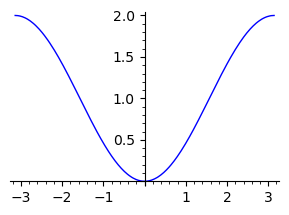

In [20]:
plot(1-cos(x), (x, -pi, pi), figsize=3)

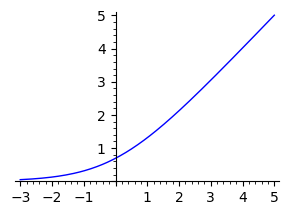

In [15]:
plot(ln(e^x+1), (x, -3, 5), figsize=3)

In [ ]:
var('a,n')
f=((-1)^n*x*(a*x)^(2*n+1))/factorial(2*n+2)
sum1=sum(f,n,0,oo,hold=True)
s(sum1 == sum1.unhold())

In [18]:
var('n,a')
f=((-1)^n*(a*x)^(2*n+1))/factorial(2*n+1)
sum1 = sum(f,n,0,oo, hold=True) # hold = before evaluating
s(sum1 == sum1.unhold())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

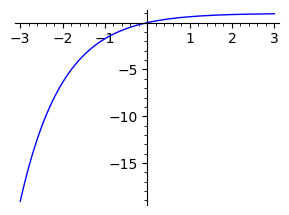

In [19]:
a,n,x = var('a,n,x')
f=((-a)^n*x^(n+1))/factorial(n+1)
sum1 = sum(f,n,0,oo,hold=True)
s(sum1 == sum1.unhold())
# Every point on the curve can expand to a Taylor series
plot(1-e^-x, (x, -3, 3), figsize=3)

In [ ]:
x1=5.99580197536
x2=6.05575999511
x3=3.83164672531
x4=3.86996319256
a=6.02-x1
b=x2-x1
c=a/b
d=180+c
f=d*0.75
g=f-135
h=x4-x3
j=x3+g*h
s(a)
s(b)
s(c)
s(d)
s(f)
s(g)
s(h)
s(j)

In [ ]:
def sum_recp(n):
    ans=0
    for i in range(1, n+1):
        ans+=1/i
    return ans
for j in [5, 10, 15, 20]:
    print(n(sum_recp(j)))

### Week 1

In [ ]:
g=9.81
v=3.64/sqrt(3/g)
theta=23*pi/180
vx=v*cos(theta)
vy=v*sin(theta)
t1=vy/g
s1=g/2*t1^2
s2=s1+1.5+0.05*sin(theta)
t2=sqrt(2*s2/g)
t=t1+t2
d=vx*t
print(n(d))

In [ ]:
s(expand((1+(x^2/2-x^4/24+x^6/720)+(x^2/2-x^4/24+x^6/720)^2+(x^2/2-x^4/24+x^6/720)^3)*(x-x^3/6+x^5/120-x^7/5040)))

In [ ]:
s(n(sin(pi/4)))
f(x)=x-x^3/factorial(3)+x^5/factorial(5)-x^7/factorial(7)+x^9/factorial(9)
s(n(f(0)))
s(n(f(pi/4)))
s(n(f(pi/2)))

Projectile problem - Correct solution:

In [21]:
d=pi/180
x,y=var('vy,ty')
s=solve([ vy*ty==(200-4*sin(35*d)), vy==9.8*ty ],vy,ty,solution_dict=True)
vy=s[1][vy]
ty=s[1][ty]
D=vy*(cos(35*d)/sin(35*d))*(ty+sqrt(200*ty/vy))
print(D.n())

566.339564823947


In [ ]:
plot(x/sin(x), (x, -pi, pi), figsize=4, ymin=0, ymax=7)

In [ ]:
f(x)=1/(1+e^x)
show(plot(f(x), (x, -5, 5), figsize=3))
show(plot(f(x)+f(-x), (x, -5, 5), figsize=3))
show(plot(f(x)-f(-x), (x, -5, 5), figsize=3))
show(plot(diff(f(x)), (x, -5, 5), figsize=3))
show(plot(f(x)*(1-f(x)), (x, -5, 5), figsize=3))
show(plot(f(x)*f(-x), (x, -5, 5), figsize=3))
show(plot(x/sin(x), (x, -5, 5), figsize=3, ymin=-5, ymax=5))

In [ ]:
s=7
x=2
for i in range(5):
    x=(x+s/x)/2
    print(n(x))
print(n(sqrt(s)))

## Midterm 1-3

for checking answers

In [ ]:
f=integral(x^4,x,0,1)
g=integral((1-x^2)^2,x,0,1)
h=integral(x^2*(1-x^2),x,0,1)
s(n(h/sqrt(f*g)))

In [ ]:
s(desolve((6*x^2*y+4*y^3)*diff(y,x)+4*x^3+6*x*y^2==0,y,show_method=False))

In [ ]:
var('t x')
assume(t>0)
s(integral(x^2*e^(x^3),x,0,t))

In [ ]:
y=function('y')(x)
s(desolve(diff(y,x)+3*x^2*y==x^2,y,show_method=False))

In [ ]:
A=matrix(3,3,[2,4,1,-2,4,3,-3,6,5])
B=matrix(3,3,[2,-14,8,1,13,-8,0,-24,16])/8
s(A.inverse()==B)

In [ ]:
A=vector([1,1,1])/sqrt(3)
B=vector([1,-1,0])/sqrt(2)
C=vector([1,1,-2])/sqrt(6)
s(A.cross_product(B)==C)

In [ ]:
var('t z')
s(diff((z-x)*e^(i*t*z),z))

In [ ]:
var('x y')
s(diff(y/(x^2+y^2),y))

In [ ]:
var('a')
s(diff(3^x,x))
s(n((24*ln(2)-7)/9))
plot((x^5-1)/ln(x),(x,0,1),figsize=3)

## Vector Calculus

### Review

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/Maxwell_eq1.jpg" alt="vector_cal" width="450">

Maxwell eq:

1. Gauss's law for **static** electric fields ($E$)
1. Gauss's law for **static** magnetic fields ($B$)
1. Faraday's law which says a **changing magnetic field** (over time) produces an electric field
1. Ampere-Maxwell's law says a **changing electric field** (over time) produces a magnetic field

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/Maxwell_eq2.png" alt="vector_cal" width="800">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/em_model.png" alt="vector_cal" width="800">

> Field Theory

Scalar field -> Vector field -> Tensor field

- a scalar field has 1 value at a given point of a mathematical space (e.g. Euclidean space or manifold), 
- a vector field has 2 (direction and magnitude), vector field is a special case of a tensor field, or a tensor field of rank 1.
- a tensor field has 2+ (e.g. represented by an ellipse at each point with semi-major axis length, semi-minor axis length, and direction)

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/Tensor_field.png" alt="vector_cal" width="650">
<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/Scalar-vec-mat-tensor.png" alt="vector_cal" width="650">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/grad_div_curl.png" alt="vector_cal" width="450">

Scalar field has math modelling - **Grad**

Vector field has two-forms of math modelling (use separately or combined): 
1. connecting to a point, converge or diverge - **divergence** (e.g. electric charge); 
    - physical meaning? 
2. rotating a point - **curl** (e.g. cyclone, solar, galaxy)

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/vectorfield.png" alt="vector_cal" width="800">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/graddivcurl.png" alt="vector_cal" width="650">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/graddivcurl2.png" alt="vector_cal" width="650">

Comparison of single-var, multi-var, vector calculus
- vector calculus is usually treated as 3D multi-var calculus

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/singlemultivector.png" alt="vector_cal" width="750">

The universe try to tell us that when you integrate the "derivative" of a function within a region
- where the type of integration/derivative/region/function involved might be multidimensional, but what you get just depends on the value on boundary function of that region
- this is one of the most beautiful things in the universe.

| Formula | Solution | dimensional reduction |
| - | - | - | 
| Newton-Leibniz formula | 1D -> dot | $\int_a^b f(x)dx=F(b)-F(a)   $|
| Green theorem  | 2D -> 1D | $\iint_D (-\frac{\partial P}{\partial y} + \frac{\partial Q}{\partial x})dxdy = \oint_{\partial D} Pdx + Q dy$ |
| Gauss (Gauss' flux theorem) | 3D -> 2D | $\iiint_D (\frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y} + \frac{\partial R}{\partial z})dxdydz = \oint_{\partial D} Pdydz + Q dzdx + R dxdy$ |
| Divergence theorem | nD -> 3D |
| Generalized Stokes formula | manifolds | $\int_M d\omega = \int_{\partial M} \omega  $ |

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/stokes.png" alt="generalstokes.png" width="580">
<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/divergence.png" alt="generalstokes.png" width="580">



Notes

- Divergence : (Add notes)
    - Cartesian coordinates : $\frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y}+\frac{\partial F_z}{\partial z}$
- Curl : (Add notes)
    - Cartesian coordinates : $(\frac{\partial F_z}{\partial y}-\frac{\partial F_y} {\partial z})\hat{i}+(\frac{\partial F_x}{\partial z}-\frac{\partial F_z}{\partial x})\hat{j}+(\frac{\partial F_y}{\partial x}-\frac{\partial F_x}{\partial y})\hat{k}$
- Line integral : Related to arc length so formula is $I=\large\int_a^bds\vec{F}\cdot\hat{t}=\int_{x_a}^{x_b}dx\sqrt{1+(\frac{df}{dx})^2}\vec{F}(x)\cdot\hat{t}$
    - $\hat{t}$ is the tangent vector to path.
    - $\vec{F}$ is the vector field.
    - Then use arc length formula or second section for the line integral.
- Stokes' Theorem : $\oint_Sds\vec{F}\cdot\hat{t}=\int_SdS(\nabla\times\vec{F})\cdot\hat{n}$ or that the line integral around the path and the surface integral over the area bounded by the path is related 1:1.
- Gradient($\nabla f$): 
    - Cartesian Coordinates : $\nabla f=\frac{\partial f}{\partial x}\hat{i}+\frac{\partial f}{\partial y}\hat{j}+\frac{\partial f}{\partial z}\hat{k}$
    - Polar/Cylindrical Coordinates : $\nabla f=\frac{df}{dr}\hat{r}+\frac{1}{r}\frac{df}{d\theta}\hat{\theta}+\frac{df}{dz}\hat{z}$
    - Spherical Coordinates : $\nabla f=\frac{df}{dr}\hat{r}+\frac{1}{r}\frac{df}{d\theta}\hat{\theta}+\frac{1}{r\sin{\theta}}\frac{df}{d\phi}\hat{\phi}$

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/Types_curves.jpg" alt="curve_types.jpg" width="520">


[Generalized Stokes' theorem or Fundamental Theorem of Multivariate Calculus](https://en.wikipedia.org/wiki/Generalized_Stokes_theorem)
- In case you are curious, this deeper theorem captures all above theorems (and more) in one formula,
- by analysing differential forms on manifolds, which simplifies several theorems from vector calculus 

### Coding review

In [ ]:
var('r')
f=cos(y)*(x-r^3/x^2)
s(diff(f,x))
s(diff(f,y)/x)

In [4]:
var('r E v')
f=cos(y)*(x*E+(r^2*(v-E*r))/x^2)
s(diff(f,x))
s(diff(f,y)/x)
s(diff(f,z)/(r*sin(y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[SageManifolds](https://sagemanifolds.obspm.fr/documentation.html) solve differential geometry and tensor calculus of any dimension

In [2]:
# vector field - div, curl
E.<x,y,z> = EuclideanSpace()  # set up coordinates in ()
v = E.vector_field(x^2-y^2, -2*x*y, 0, name='v')
sca = E.scalar_field(x^2+y^2-z^2, name='sca')
s(v.display()) # original func
s(sca.display())

s(v.div().display())
s(v.curl().display())
from sage.manifolds.operators import grad, laplacian
s(grad(sca).display()) 
s(laplacian(sca).display()) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# divergence algo (manually)
var('x y z') ; Fx=z^2 ; Fy=x^2 ; Fz=-y^2 
div = diff(Fx,x) + diff(Fy,y) + diff(Fz,z)  
s(div)

# curl Approach 1: self-made algorithm
curlx = diff(Fz,y) - diff(Fy,z)     
curly = diff(Fx,z) - diff(Fz,x)
curlz = diff(Fy,x) - diff(Fx,y)
s(vector([curlx, curly, curlz]))

# curl Approach 2: built-in function
E.<x,y,z> = EuclideanSpace()  
v = E.vector_field(z^2, x^2, -y^2, name='v')
s(v.curl().display())

E = EuclideanSpace(3)  # btw: set up 
s(E.cartesian_coordinates())
s(E.cylindrical_coordinates())
s(E.spherical_coordinates())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# From vector to calculus
v = vector(RR, [1.2, 3.5, 4.6])
w = vector(RR, [1.7,-2.3,5.2])
s(v*w)
s(v.cross_product(w))

# Vector Calculus
var('t')
r=vector((2*t-4, t^2, (1/4)*t^3)) # start from displacement formula
s(r)
s(r(t=5))

velocity = r.diff(t) # now velocity formula
s(velocity)       # this expression does not function as a function
s(velocity(t=1))  # so we substitute explicitly
T=velocity/velocity.norm() # calculate the unit vector
s(T(t=1).n())
arc_length = numerical_integral(velocity.norm(), 0,1)
s(arc_length)
x,y,z=var('x y z')
plot_vector_field3d((x*cos(z),-y*cos(z),sin(z)), (x,0,pi), (y,0,pi), (z,0,pi),colors=['red','green','blue'])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Graphics3d Object

### Week 6

In [ ]:
var('y')
s(diff((ln(x^2+y^2))/2,y))
s(diff(arctan(y/x),x))
s(n(arctan(3+sqrt(3))*180/pi))
s(n(sqrt(13+6*sqrt(3))))

### Week 5

In [ ]:
var('y a n')
f=a*e^(-x-y-a)
s(integral(integral(f,x,0,a),y,0,a))
s(diff(-x*y/(x^2+y^2),x))
s(diff(x^2/(x^2+y^2),y))
s(diff(1/(x^2+1)^(3/2),x))
s(expand(integral(3*x*(y-(a/2)),x,n-(a/2),n+(a/2))))

### Week 4

In [ ]:
var('x y')
s(diff(x/sqrt(x^2+y^2), y))
s(diff(y/sqrt(x^2+y^2), x))
s(diff(-x/sqrt(x^2+y^2), x))
s(diff(-y/sqrt(x^2+y^2), y))

## Complex Analysis

Notes:
- Cauchy-Riemann Equations($z=x+iv$): $\frac{du}{dx}=\frac{dv}{dy}\quad\frac{du}{dy}=-\frac{dv}{dx}$
    - Rewritten Form: $\frac{du}{dx}-\frac{dv}{dy}=0\quad\frac{du}{dy}+\frac{dv}{dx}=0$
    - Any function that satisfies these equations are analytic.
- (Cauchy's) Residue Theorem: $\int_\gamma dzg(z)=2\pi i\sum_{\text{poles of g inside }\gamma}(\text{residue of each pole of }g)$
- Residue: The residue of f(z) is $\lim_{z\rightarrow z_0}f(z)(z-z_0)$. It can $\lim_{z\rightarrow z_n}(z-z_n)(\text{integrand of contour integral})$

### Coding review

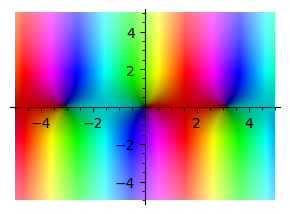

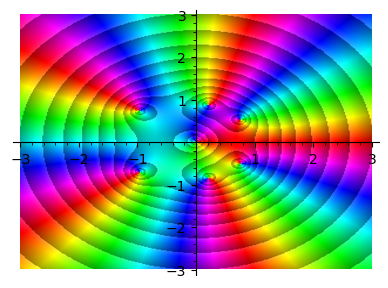

In [7]:
show(complex_plot(sin(x), (-5, 5), (-5, 5), figsize=3))
f(z)=z^5 + z - 1 + 1/z
complex_plot(f, (-3, 3), (-3, 3), plot_points=300,figsize=4,contoured=True)

### Week 8

In [8]:
limit(pi*cot(pi*z)/z^2,z=0)

Infinity

In [9]:
var('a b')
assume(a>0)
assume(b>0)
bool(integral(cos(b*x)/(x^2+a^2),x,-oo,oo)==pi*(e^(-a*b))/a)

True

In [ ]:
var('u b')
s(diff((x-u)*e^(i*b*x),x))

In [ ]:
bool(integral(1/(2-sin(x)),x,0,2*pi)==2*pi/sqrt(3))

In [ ]:
var('a')
assume(a>0)
assume(a<1)
integral(1/(1+a^2-2*a*cos(x)),x,0,2*pi)

In [ ]:
s(diff((x-u)*e^(i*m*x),x))
assume(m>0)
s(integral(cos(m*x)/(1+x^4),x,0,oo))

In [ ]:
var('u')
s((1-u/2+u^2/24)/(1-u/6+u^2/120))
s(diff(tan(pi*x),x))
s(diff((x-u)*cos(pi*x),x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

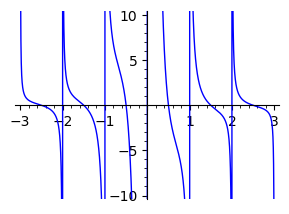

In [11]:
s(diff(cot(pi*x),x))
s(diff(sin(pi*x)^2))
plot(pi/(x^2*tan(pi*x)),x,-3,3,ymin=-10,ymax=10,figsize=3)

In [12]:
var('c y z')
f=x^y*cos(z)
s(diff(x^2*diff(f,x),x)+diff(sin(z)*diff(f,z),z)/sin(z))

<IPython.core.display.Math object>

In [ ]:
s(integral(1/(x^2-2*x+4),x,-oo,oo))
s(diff(x^2*tan(pi*x),x))
s(diff(pi*cot(pi*x),x))
s(diff(x^2/(pi*cot(pi*x)),x))

In [ ]:
var('x y')
z=x+i*y
print(bool(1/z==(x-i*y)/(x^2+y^2)))
print(bool(z^2==x^2-y^2+2*i*x*y))
print(bool(z^3==x*(x^2-3*y^2)+i*y*(3*x^2-y^2)))

In [13]:
var('x')
print(n(integral( (x+2-i) / (x-3*i/2) ,x,-1,1)/2/pi/i))
print(n(integral(i*(1+i*x+2)/(1+i*x-i/2),x,-1,1)/2/pi/i))
print(n(integral((x-i-2)/(-x+i-i/2),x,-1,1)/2/pi/i))
print(n(integral(i*(1-i*x)/(i*x+1+i/2),x,-1,1)/2/pi/i))

0.374334083621998 - 0.224726365278291*I
0.740707869608976 + 0.267178513616855*I
0.704832764699133 + 0.494518077358574*I
0.180125282069893 - 0.0369702256971377*I


## Linear Algebra

### Review

 | Algebra | Linear Algebra | Concept consistency |
| --- | --- | --- | 
| Solves scalar equations, e.g., polynomials like $ax^2+bx+c=0$. Methods: factoring, quadratic formula. | Solves systems of linear equations, e.g., $Ax=b$. Methods: Gaussian elimination, matrix inversion. | **Solving Equations:** Both seek solutions to equations; algebra focuses on scalar polynomials, linear algebra on vector/matrix systems. |
| Finds roots of polynomials, e.g., $x^2 - 3x + 2 = 0$ gives $x=1,2$. | Finds eigenvalues via characteristic polynomial $\det(A - \lambda I) = 0$ . | **Roots and Eigenvalues:** Both involve root-finding of polynomials; eigenvalues are roots of matrix-derived polynomials. |
| Operations on numbers, polynomials, or abstract structures (groups, rings). E.g., polynomial multiplication. | Operations on vectors/matrices (addition, multiplication). Vector spaces define structure. | **Operations and Structures:** Both study structured sets with operations; algebra emphasizes general algebraic structures, linear algebra focuses on vector spaces. |
| Studies functions, e.g., $f(x) = x^2 + 3$, or homomorphisms in abstract algebra. | Studies linear transformations, e.g., $T(v) = Av$, represented by matrices. | **Functions and Transformations:** Both analyze mappings; algebra includes nonlinear functions, linear algebra restricts to linear transformations. |
| Factors polynomials, e.g., $x^2 - 1 = (x-1)(x+1)$, or integers into primes. | Decomposes matrices, e.g., eigendecomposition $A = PDP^{-1}$ or LU decomposition. | **Factorization and Decomposition:** Both break complex objects into simpler parts; algebra factors scalars, linear algebra decomposes matrices. |
| Studies groups, rings, fields. E.g., integers form a ring, polynomials a ring. | Studies vector spaces, matrix rings. E.g., $n \times n$ matrices form a ring. | **Abstract Structures:** Both explore abstract systems with operations; vector spaces are modules, and matrix rings align with algebraic rings. |

 <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/eigen_polynomi.jpg" alt="eigen" width="650">


Notes
- Row Reduction : Method where make lower-left triangle of 0s using augmentation. Uses shown below.
    - Linear Equations(Homogeneous : all RHS's=0) : Solve for variables one by one.
    - Determinant : Product of the lead diagonal as all other products will be 0.
    - Inverse : Use augmentation to find inverse.
- Inverse($AA^{-1}=I$) : Use cofactors and adjoint(or row reduction) then divide by determinant(can also calculate using row reduction).
- Determinant : Measures the factor by which an area or volume is multiplied by. Calculate using formula or row reduction.
- Gram-Schmidt Orthogonalization :
    - Formula:
        - $\large\hat{e_1}=\frac{v_1}{\sqrt{v_1\cdot v_1}}$
        - $\large\hat{e_2}=\frac{v_2-(v_2\cdot\hat{e_1})\hat{e_1}}{|\vec{e_2}|}$
        - $\large\hat{e_3}=\frac{v_3-(v_3\cdot\hat{e_1})\hat{e_1}-(v_3\cdot\hat{e_2})\hat{e_2}}{|\vec{e_3}|}$
        - For orthogonalization, determine coefficients by using the fact that $(e_i\cdot e_j)=0$ where $\cdot$ can mean dot product of $(f\cdot g)=\int_0^1dxf(x)g(x)$
    - Applications : Includes linear algebra, numerical analysis, quantum mechanics, machine learning etc.
- Eigenvalues & Eigenvectors
    - Use determinant formula : Determinant of matrix minus $\lambda I=0$
    - Quick Method : 
        1. The mean of the eigenvalues is the mean of the numbers on the lead diagonal.
        1. The determinant of the matrix is the product of the eigenvalues.
        1. $d^2=m^2-p$ Eigenvalues $= m\pm d$

 <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/eigen_val_vec.jpeg" alt="eigen" width="850">


Lab Notes
- When in series(circuit), the current is always the same.
- Kirchhoff's Laws(can be used to solve for current or voltage)
    - Current Law : The current entering a node is the same as the current exiting the same node as electrons can be created out of nothing and can't just disappear.
    - Voltage Law : The voltage drop is 0 (one of the capacitors or resistors will probably be a voltage gain.)
- Types of Circuits : 
    - Series
    - Parallel
    - RC(R:resistor, C:capacitor) : Circuit that comprises of only resistors and capacitors(and stuff connecting them). This has a constant current as it is only affected using arithmetic operations by the resistors and capacitors.
    - RL/RLC(L:Inductor) : Circuit that also has an inductor which causes a non-constant current($V_L=L\frac{dI}{dt}$).
        - RLC circuits can make microwaves oscillating at its resonant frequency. Then using formulae you can get the right wavelength using the formula to make microwaves.

**diff btw C and L??**

 <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/RLC.jpg" alt="eigen" width="800">


### Problem Set 11

In [ ]:
f(x) = 20*x^4-85*x^3-8037/16*x^2+5231/16*x+33789/128
f(5/4)

In [15]:
# Define the polynomials
R.<x> = QQ[] # Polynomial ring for rational field
f = 20*x^4-85*x^3-8037/16*x^2+5231/16*x+33789/128
g = 2*x - 5

# Perform long division using quo_rem()
q, r = f.quo_rem(g)  # q is the quotient, r is the remainder

# Print the results
s(f"Quotient: {q}")
s(f"Remainder: {r}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
a=8*x^4-90*x^3-5089/16*x^2+61009/128
b=4*x^3+71/2*x^2-104*x+3211/32
c=x^2-13/2*x+185/16
s(expand(a+b*(2*x-5)+c*(2*x-5)^2))

In [17]:
a=y*(13/4-x)-(8*x^2*y-45*x*y+247/4*y)/(20-8*x)
b=(8*x^2*y-45*x*y+247/4*y)/(20-8*x)
s(expand(a^2+y^2+b^2)) # x=lambda

<IPython.core.display.Math object>

In [18]:
var('x y z')
s(expand((19-8*x)*(y*(13/4-x)-z)))

<IPython.core.display.Math object>

In [16]:
var('a b d')
A=matrix(2,2,[a,b,b,d])
m=A.trace()/2
p=A.det()
l=m-sqrt(m^2-p)
s(a-l,d-l)

<IPython.core.display.Math object>

### Week 10

In [19]:
var('k l m1 m2 w')
A=matrix(2,2,[w^2-(k+l)/m1,l/m1,l/m2,w^2-(k+l)/m2])
s(A.eigenvalues())

<IPython.core.display.Math object>

In [20]:
var('a b c')
s(expand((2*x-1)*(a+b*x+c*x^2)))
s(integral((a+b*x+c*x^2)^2,x,0,1))
s(integral(a*x^2+b*x+c,x,-1,1))
s(integral(x*(a*x^2+b*x+c),x,-1,1))
s(integral((a*x^2+c)^2,x,-1,1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
A=matrix([[2,1,-sqrt(2)]
        ,[1,1,sqrt(2)]
        ,[-sqrt(2),sqrt(2),1]])
s(expand(A.det()))
s(A.eigenvectors_right())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Row Reduction

In [22]:
M=[[1,0,0,6,2],[7,5,3,3,5],[3,1,4,3,4],[8,0,0,0,2],[5,8,3,5,7]] # input matrix
for i in [1,2,3,4]: # for 2nd to 5th rows
    for j in [1,2,3,4]: # for 2nd to 5th columns
        M[i][j]-=M[0][j]*M[i][0]/M[0][0] # minus the number required
    M[i][0]=0 # change number in 1st column to 0
for i in [2,3,4]: # repeat process
    for j in [2,3,4]:
        M[i][j]-=M[1][j]*M[i][1]/M[1][1]
    M[i][1]=0
for i in [3,4]:
    for j in [3,4]:
        M[i][j]-=M[2][j]*M[i][2]/M[2][2]
    M[i][2]=0
M[4][4]-=M[3][4]*M[4][3]/M[3][3]
M[4][3]=0
s(matrix(5,5,M))

<IPython.core.display.Math object>

In [23]:
s(factor(10062))
s(factor(75335))
s(factor(31434))
s(factor(80002))
s(factor(58357))
s(factor(408))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Week 9

In [ ]:
var('t')
assume(t>0)
bool(integral(e^(i*t*x)/(x-3-i),x,-oo,oo)==2*pi*i*e^(-t+3*i*t))

In [24]:
A=matrix(4,4,[1,3,-1,2,2,1,3,1,-1,2,-4,1,-2,1,2,-3])
A.det()

0

In [25]:
var('x')
A=matrix(3,3,[1,2-x^2,2,2,3,1,2,3,1])
A.det()
expand(-3*(2-x^2)*(9-x^2)+3*(9-x^2)+15*(2-x^2)-15)

-3*x^4 + 15*x^2 - 12

## Differential Equations & Fourier Analysis

### Review

Notes: 

- For a first-order DE, $\frac{dy(t)}{dt}+q(t)y(t)=r(t)\text{ has a solution }y(t)=y(t_0)e^{-\int_{t_0}^t q(t')dt'}+e^{-\int_{t_0}^t q(t''')dt'''}\int_{t_0}^t dt'\,r(t') e^{\int_{t_0}^{t'}dt'' q(t'')}$

- $y(t)$ Function Prototype, $t$ Dependent Variable
- $y$ Function Name = Independent Variable
Five Easy Pieces(Non-linear ODE)

For non-linear ODE of the form $N(t,y)dy+M(t,y)dt=0$ use five easy pieces.

1. If it is of the form $\frac{dy}{dt}+q(t)y=r(t)y^n$ then substitute $w=y^{1-n}$
1. Is it of the form $N(y)\text{ and }M(t)$? Then directly integrate
1. Are both $M$ and $N$ homogeneous of the same degree(This means that $M(\lambda t,\lambda y)=\lambda^kM(t,y)$ and $N(\lambda t,\lambda y)=\lambda^k N(t,y)$.)? Reduce equation to 2nd form.
1. Is it an exact differential : Check $\frac{\partial M}{\partial y}=\frac{\partial N}{\partial t}$. If yes, find a function $F$ such that it is an exact differential when integrating $M$ and $N$ to $t$ and $y$ respectively. Add the appropriate $+C$ to make the form work.
1. Is it reducible to exact? Check by $\frac{1}{N}\left ( \frac{\partial M}{\partial y}-\frac{\partial N}{\partial t}\right )$ and $\frac{1}{M}\left ( \frac{\partial M}{\partial y}-\frac{\partial N}{\partial t}\right )$. $Q = \exp \left[ {\int} \frac{1}{M} \left( \frac{\partial N}{\partial t}-\frac{\partial M}{\partial y} \right) dy \right]$

- Frenet-Serret Apparatus
    - Tangent : $\vec{T}=\frac{d\alpha(s)}{ds}$
    - Normal Vector & Curvature : $\frac{d\vec{T}}{ds}=N(s)\kappa(s)$ & $|N(s)|=1$
    - Binormal Vector & Torsion : $\vec{B}=\vec{T}\times\vec{N}$ & $\tau(s)=-\frac{d\vec{B}}{ds}\cdot\vec{N}$

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de1.png" alt="de1.png" width="650">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de2.png" alt="de2.png" width="650">

notations: 
<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de3.png" alt="de3.png" width="500">

Four categories: order, linear, homo, PDE

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de4.png" alt="de4.png" width="490">

n-order <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de5.png" alt="de5.png" width="390">

Homo VS. Non-Homo <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de6.png" alt="de6.png" width="490">
 
PDE <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de7.png" alt="de7.png" width="490">

DE is governing equation

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de8.png" alt="de8.png" width="500">

Converting High Order Differential Equation into First Order Simultaneous Differential Equation

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de9.png" alt="de8.png" width="350">

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de10.png" alt="de8.png" width="450">

e.g. <img src="https://raw.githubusercontent.com/tomctang/NB_img/main/de11.png" alt="de8.png" width="580">


Common Types of DE
- Separable differential equations
- First-order linear differential equations
- Simple Harmonic Motion
- Homogeneous linear differential equations with constant coefficients
- Bernoulli's equation
- Logistic differential equations
- Systmes of linear differential equations

Types of PDE

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/pde2.png" alt="Map of Math" width="700"> 

<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/pde1.png" alt="Map of Math" width="550"> 


Wu–Yang dictionary links concepts in particle physics (specifically gauge theory) and mathematics (differential geometry and fiber bundle theory)

| Particle Physics Term | Mathematical Term | Description |
| --- | --- | --- |
| Gauge Field | Connection on a Fiber Bundle | The gauge field, which describes interactions in gauge theories (e.g., electromagnetic or Yang-Mills fields), corresponds to a connection on a principal fiber bundle, defining how fields transform across space-time. |
| Gauge Potential (e.g., $A_\mu$​) | Connection Form | The gauge potential, a vector potential like the electromagnetic potential, is mathematically represented as a connection form, a differential form that encodes the connection on the bundle. |
| Field Strength (e.g., $F_{\mu\nu}$​) | Curvature of the Connection | The field strength tensor, which quantifies the strength of the gauge field (e.g., electromagnetic field tensor), corresponds to the curvature of the connection, a 2-form derived from the connection form. |
| Gauge Transformation | Change of Local Trivialization (or Section) | A gauge transformation, which adjusts the gauge potential to describe the same physical situation, is equivalent to changing the local trivialization or section of the fiber bundle, altering the coordinate system without changing the bundle's structure. |
| Source (e.g., Electric Current) | (No Direct Equivalent) | In the original Wu-Yang dictionary, sources like electric currents were included but lacked a direct mathematical analogue, indicating a gap in the correspondence at the time. This later inspired mathematical developments, such as Donaldson theory. |
| Phase Factor (Nonintegrable) | Holonomy | The nonintegrable phase factor, as seen in phenomena like the Aharonov-Bohm effect, corresponds to holonomy, which describes the geometric phase acquired by a vector transported around a closed loop on the bundle. |
| Magnetic Monopole | Nontrivial Fiber Bundle | The magnetic monopole, such as the Wu-Yang monopole, is described by a nontrivial fiber bundle, where the bundle’s topology (e.g., Hopf fibration) prevents a global gauge choice, explaining quantization conditions. |


<img src="https://raw.githubusercontent.com/tomctang/NB_img/main/planes.png" alt="Map of Math" width="650"> 


| Aspect | Classical Mechanics | Quantum Mechanics | 
|---|---|---| 
| Definition | Describes the motion of macroscopic objects using Newton's laws and deterministic principles. | Governs the behavior of particles at atomic and subatomic scales using probabilistic principles. | 
| Scale | Macroscopic (e.g., planets, cars, projectiles). | Microscopic (e.g., atoms, electrons, photons). | 
| Nature of Motion | Deterministic: Future states can be precisely predicted given initial conditions. | Probabilistic: Outcomes are described by probabilities (wave functions). | 
| Key Principles | - Newton's Laws of Motion<br>- Conservation of energy, momentum<br>- Continuous motion | - Wave-particle duality<br>- Uncertainty principle<br>- Superposition<br>- Quantization | 
| Position and Momentum | Can be measured simultaneously with arbitrary precision. | Subject to Heisenberg’s Uncertainty Principle (cannot measure both precisely at once). | 
| Energy | Continuous energy levels. | Quantized energy levels (discrete values). | 
| Wave-Particle Duality | Objects are either particles or waves, not both. | Particles exhibit both wave-like and particle-like properties (e.g., electrons, light). | 
| Mathematical Framework | Uses differential equations (e.g., F = ma). | Uses wave functions, Schrödinger equation, and matrix mechanics. | 
| Measurement | Measurement does not affect the system’s state. | Measurement collapses the wave function, altering the system’s state. | 
| Superposition | Not applicable; objects exist in one definite state. | Particles exist in multiple states simultaneously until measured. | 
| Entanglement | Not applicable. | Quantum systems can be entangled, sharing special correlations regardless of distance. | 
| Examples of Phenomena | - Planetary orbits<br>- Pendulum motion<br>- Projectile motion | - Electron orbitals in atoms<br>- Quantum tunneling<br>- Superconductivity | 
| Key Figures | Isaac Newton, Lagrange, Hamilton | Max Planck, Werner Heisenberg, Erwin Schrödinger, Niels Bohr | 
| Applications | Engineering, astronomy, mechanics of everyday objects. | Quantum computing, semiconductors, lasers, MRI, atomic clocks. | 
| Limitations | Fails at very small scales or high speeds (near the speed of light). | Complex calculations; less intuitive for macroscopic systems. |

Five quantum behaviours: 

1. Wave-particle duality: Tiny particles look like they are behaving like waves or particles, depending on how you observe them.
1. Superposition: In the quantum world, particles can exist in multiple states at once.
1. The Heisenberg uncertainty principle: Nature imposes a fundamental limit on how precisely you can measure something. (You can’t measure certain pairs of properties at the same time with unlimited precision.) 
1. Entanglement: Two things can be so interconnected that they influence each other, regardless of distance apart.
1. Spin: Spin is a fundamental characteristic of elementary particles. Like mass or charge, spin determines a particle’s behavior and interaction with other particles.

Further comparison btw Classical and Quantum in terms of Math
| **Aspect** | **Classical Mechanics** | **Quantum Mechanics** |
|------------|-------------------------|-----------------------|
| **Core Mathematical Framework** | Newtonian mechanics, Lagrangian, or Hamiltonian formulations with differential equations. | Wave functions, operators, and matrix mechanics, governed by the Schrödinger equation. |
| **Key Equations** | - Newton’s Second Law: $ F = ma $ <br> - Lagrangian: $ L = T - V $ <br> - Hamiltonian: $ H = T + V $ <br> - Equations of motion (e.g., $ \ddot{x} = -\frac{k}{m}x $ for harmonic oscillator) | - Time-dependent Schrödinger Equation: $ i\hbar \frac{\partial \psi}{\partial t} = \hat{H}\psi $ <br> - Time-independent: $ \hat{H}\psi = E\psi $ <br> - Heisenberg equation: $ \frac{d\hat{A}}{dt} = \frac{i}{\hbar}[\hat{H}, \hat{A}] + \frac{\partial \hat{A}}{\partial t} $ |
| **Variables** | Position ($ x $), velocity ($ v $), acceleration ($ a $), momentum ($ p = mv $). | Wave function ($ \psi $), probability density ($\mid \psi \mid^2$). |
| **Nature of Variables** | Continuous and deterministic. | Probabilistic; wave function describes probability amplitudes. |
| **Mathematical Tools** | - Ordinary differential equations (ODEs) <br> - Calculus of variations <br> - Phase space trajectories | - Partial differential equations (PDEs) <br> - Linear algebra (matrices, eigenvectors) <br> - Hilbert space |
| **State Representation** | Precise coordinates in phase space (position and momentum). | Wave function $ \psi(x,t) $ in a complex Hilbert space. |
| **Time Evolution** | Deterministic via Newton’s laws or Hamilton’s equations. | Probabilistic via the Schrödinger equation. |
| **Operators** | Not used; variables are directly measurable. | Observables are Hermitian operators (e.g., position $ \hat{x} $, momentum $ \hat{p} $). |
| **Commutation Relations** | Variables commute (e.g., $ xp = px $). | Non-commutative operators, e.g., $ [\hat{x}, \hat{p}] = i\hbar $. |
| **Energy Representation** | Energy as a scalar: $ E = T + V $. | Energy via Hamiltonian operator: $ \hat{H}\psi = E\psi $. |
| **Probability** | Not probabilistic; motion is fully predictable. | Probabilistic; probability density given by $ \mid \psi \mid^2 $. |
| **Quantization** | Continuous variables (energy, position, etc.). | Quantized observables (e.g., discrete energy levels). |
| **Boundary Conditions** | Define specific solutions to differential equations. | Constrain wave function (e.g., normalization, continuity). |
| **Examples of Calculations** | - Projectile trajectory: $ x(t) = x_0 + v_0 t + \frac{1}{2} a t^2 $ <br> - Harmonic oscillator: $ \omega = \sqrt{k/m} $ | - Hydrogen atom energy levels: $ E_n = -\frac{13.6}{n^2} $ eV <br> - Quantum tunneling probabilities |
| **Coordinate System** | Cartesian or generalized coordinates in configuration space. | Abstract Hilbert space or position/momentum representations. |
| **Complex Numbers** | Rarely used; real-valued quantities dominate. | Essential; wave functions are complex-valued. |

### Week 13

In [26]:
s(diff(e^t*cos(2*t),t))
s(diff(e^t*sin(2*t),t))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print(bool(diff(B,t,2)-2*diff(B,t)+5*B==t*e^t*sin(2*t)))
A(t)=diff(B,t)
B(t)=B
B(0)
C=B-e^t*cos(2*t)/64+e^t*sin(2*t)/2
print(bool(diff(C,t,2)-2*diff(C,t)+5*C==t*e^t*sin(2*t)))

In [28]:
A=e^t/64*(cos(2*t)*(1-8*t^2)+4*t*sin(2*t)-cos(2*t)-32*sin(2*t))
B=e^t*(cos(2*t)*(t*sin(4*t)/16+cos(4*t)/64-t^2/8)+sin(2*t)*(sin(4*t)/64-t*cos(4*t)/16))
s(B)
bool(A==B)

<IPython.core.display.Math object>

False

In [ ]:
y=e^t/64*(cos(2*t)*(1-8*t^2)+4*t*sin(2*t)-cos(2*t)-32*sin(2*t))
bool(diff(y,t,2)-2*diff(y,t)+5*y==t*e^t*sin(2*t))

In [29]:
y=function('y')(t)
s(desolve(diff(y,t,2)-2*diff(y,t)+5*y==t*e^t*sin(2*t),y,ics=[0,0,1],show_method=True))

<IPython.core.display.Math object>

In [30]:
var('t')
print(bool(e^t/64*(cos(2*t)*(1-8*t^2)+4*t*sin(2*t))==e^t*(cos(2*t)*(t*sin(4*t)/16+cos(4*t)/64-t^2/8)+sin(2*t)*(sin(4*t)/64-t*cos(4*t)/16))))
s(diff(e^t/64*(cos(2*t)*(1-8*t^2)+4*t*sin(2*t)),t))

True


<IPython.core.display.Math object>

In [31]:
var('t E_0 omega_0 R L C')
s(diff(E_0/(i*R*omega_0-L*omega_0^2+1/C)*e^(i*omega_0*t),t))

<IPython.core.display.Math object>

In [32]:
var('y10 y11 y12 y20 y21 y22 y30 y31 y32')
var('a2 a1 a0')
y13=-(a2*y12+a1*y11+a0*y10)
y23=-(a2*y22+a1*y21+a0*y20)
y33=-(a2*y32+a1*y31+a0*y30)
A=matrix(3,3,[y11,y21,y31,y11,y21,y31,y12,y22,y32])
C=matrix(3,3,[y10,y20,y30,y12,y22,y32,y12,y22,y32])
E=matrix(3,3,[y10,y20,y30,y11,y21,y31,y13,y23,y33])
B=E.det()
W=matrix(3,3,[y10,y20,y30,y11,y21,y31,y12,y22,y32])
W1=W.det()
s(expand(B))
s(expand(W1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
var('t')
s(diff(e^t*(cos(2*t)*(t*sin(4*t)/16+cos(4*t)/64-t^2/8)+sin(2*t)*(sin(4*t)/64-t*cos(4*t)/16)),t))

In [ ]:
s(integral(x*sin(2*x)/2,x))
s(integral(x*sin(2*x)*cos(2*x)/2,x))

In [33]:
A2=x*sin(2*x)*cos(2*x)/2
A1=-A2*sin(2*x)/cos(2*x)
s(A1,A2)
print(bool(A1==-x*sin(2*x)*sin(4*x)/4/cos(2*x)))
A1=integral(A1,x)
A2=integral(A2,x)
s(A1,A2)

<IPython.core.display.Math object>

True


<IPython.core.display.Math object>

In [34]:
s(expand(A[1][1]))

<IPython.core.display.Math object>

In [35]:
A=[[cos(2*x),sin(2*x)],[cos(2*x)-2*sin(2*x),sin(2*x)+2*cos(2*x)]]
A[1][1]-=A[0][1]*A[1][0]/A[0][0]
A[1][0]=0
s(matrix(A))

<IPython.core.display.Math object>

In [36]:
s(diff(e^x*cos(2*x),x))
s(diff(e^x*sin(2*x),x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
f(x)=4*x^4+28*x^3+81*x^2+112*x+64
g(x)=x+2
f.maxima_methods().divide(g)

[4*x^3 + 20*x^2 + 41*x + 30, 4]

In [38]:
s(expand((1/(2*sqrt(x^2/2+1)-x^2/(4*(x^2/2+1)^(3/2))))^2))
s(expand((x/(x^2/2+1)^(3/2))^2))
s(expand(x^4+(4*x^2+8)*(x^2+2)^3-4*x^2*(x^2+2)^2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
s(sqrt(2/(2+x^2)))

In [39]:
A=vector([sqrt(2)/(2+x^2)^(3/2),0,-x/(2+x^2)^(3/2)])
s(A)
B=vector([sqrt(2)/sqrt(2+x^2),0,-x/sqrt(2+x^2)])
s(A.dot_product(B))
bool(2/(2+x^2)+x^2/(x^2+2)^2==(4+3*x^2)/(2+x^2)^2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

In [40]:
A=vector([sqrt(2)/(2+x^2)^(3/2),0,-x/(2+x^2)^(3/2)])
B=vector([-x/sqrt(2*(2+x^2)),1/sqrt(2),-1/sqrt(2+x^2)])
s(-diff(B,x))
s(A)
bool(A==-diff(B,x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

False

In [ ]:
s(diff(1/sqrt(2+x^2),x))
s(diff(x/sqrt(2*(2+x^2))))

In [41]:
A=vector([sqrt(1+x^2/2),x/sqrt(2),arcsinh(x/sqrt(2))]) # alpha(s)
T=diff(A,x) # calculate tangent vector
N1=diff(T,x) # calculate normal vector times curvature
s(N1)
s(simplify(N1.norm())) # calculate curvature (magnitude of unnormalized normal vector
N=N1/N1.norm() # normalize normal vector

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [42]:
B=vector([-2*x/sqrt(x^2+1),x^2/(x^2+1)+1/(x^2+1)^(3/2),-2/sqrt(x^2+1)])
s(diff(B,x))
s(N)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [43]:
T=vector([x/sqrt(x^2+1),2,1/(x^2+1)])
N=vector([1/sqrt(x^2+1),0,-x/sqrt(1+x^2)])
s(T.cross_product(N))

<IPython.core.display.Math object>

In [ ]:
s(expand(x^2-2*x^2*(x^2+1)+x^4+(x^2+1)^3))

In [ ]:
s(expand(diff(x/sqrt(x^2+1),x)^2+diff(1/sqrt(x^2+1),x)^2))

In [ ]:
s(diff(x/sqrt(x^2+1),x))
s(diff(1/sqrt(x^2+1),x))

In [45]:
s(diff(sqrt(1+x^2),x))
s(diff(2*x,x))
s(diff(ln(x+sqrt(1+x^2))))
bool(x^2/(x^2+1)+4+(x^2/(x^2+1)+2*x/sqrt(x^2+1)+1)/(x^2+2*x*sqrt(x^2+1)+x^2+1)==5)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

In [ ]:
s(integral(-x*sin(2*x)^2,x))
s(integral(x*sin(2*x)*cos(2*x),x))

In [46]:
f(x)=x^4+2*x^3-3*x^2-4*x+4
print('x      y')
for i in range(-4,5):
    s(i, f(i))

x      y


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
f(x)=x^6+3*x^5-3*x^4-11*x^3+6*x^2+12*x-8
print('x      y')
for i in range(-4,5):
    s(i, f(i))

In [47]:
f(x)=x^8+4*x^7-2*x^6-20*x^5+x^4+40*x^3-8*x^2-32*x+16
print('x     y')
for i in range(-4,5):
    s(i, f(i))
bool(x^8+4*x^7-2*x^6-20*x^5+x^4+40*x^3-8*x^2-32*x+16==(x+2)^4*(x-1)^4)

x     y


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

True

In [ ]:
f(x)=x^3-7*x^2+16*x-12
print('x      y')
for i in range(-4,5):
    s(i, f(i))

### Week 12

In [ ]:
y=function('y')(x)
s(desolve(x^2*diff(y,x,2)+x*diff(y,x)-y==x,y,ics=[1,-1,-0.5]))

In [ ]:
bool((1-sin(t)^2)/sin(t)^2==-(k^2*sin(t)^2-k^2)/(k^2*sin(t)^2))

In [48]:
dx_dt=2*k^2*sin(t)^2
x=integral(dx_dt,t) ; s(x)

<IPython.core.display.Math object>

In [49]:
var('k t y')
dy_dx=sqrt((k^2-y)/y)
y=k^2*sin(t)^2
dy_dt=diff(y,t)
dx_dt=dy_dt/dy_dx
s(dx_dt)
s(dy_dx)
x=integral(dx_dt,t)
s(x)
s(dy_dt)
s(dy_dx)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
s(bool(integral(e^-(2*x)*(-2*x-3),x)==e^-(2*x)*(x+2)))
s(bool(integral((2*x+3)*e^-(3*x),x)==e^-(3*x)*(-2*x/3-11/9)))

In [ ]:
bool(1/((t/t_0)^2*sqrt(w_0+2*t_0^4/5*(1/t^5-1/t_0^5)))==t_0^2/t^2*(w_0+2*(t_0^5-t^5)/(5*t^5*t_0))^(-1/2))

In [ ]:
y=function('y')(x)
s(desolve(diff(y,x,2)-y==e^-x,y,show_method=True))

In [ ]:
var('t_0 t')
assume(t_0>0)
assume(t>t_0)
y=function('y')(x)
s(desolve(x^2*diff(y,x)+2*x*y-y^3==0,y,show_method=True))
s(-2*integral(2/x,x,t_0,t))
s(integral(-2/x^6,x,t_0,t))

In [53]:
var('a b w_0')
y=function('y')(x)
# a=ε & b=σ
assume(a>0)
assume(b>0)
s(integral(a,x,t_0,x))
s(integral(a*b*(x-t_0),x,t_0,t))
#s(desolve(diff(y,x)==a*y-b*y^2,y,ivar=x,show_method=True))
s(e^-integral(-a,x,t_0,t)/(w_0+integral(e^-integral(-a,x,t_0,x)*-1*-b,x,t_0,t)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [55]:
var('t u x')
#assume(t>0)
def bernoulli_0_1(p,q,t_0,y_0,n):
    """ This is a function for solving Bernoulli equations. Sometimes there are errors 
    because the assume command has to be used. """
    if n==0:
        y=e^-integral(p,x,t_0,t)*(y_0+integral(q*e^integral(p,x,t_0,u),u,t_0,t))
        return y
    elif n==1:
        y=y_0*e^-integral(p-q,x,t_0,t)
        return y
    else:
        raise Exception('Choose n that is 0 or 1.')
def bernoulli_2(p,q,t_0,w_0,n):
    y=e^-integral(p,x,t_0,t)*(w_0+integral(q*e^((1-n)*integral(p,x,t_0,u)),u,t_0,t))^(1/(1-n))
    return y
y(t)=bernoulli_2(-3*x,2,0,1,3)
s(n(y(0.1)))

<IPython.core.display.Math object>

In [ ]:
var('k')
s(integral((k^2*sin(2*x))/sqrt(1/sin(x)^2-1),x))

### Week 11

In [ ]:
var('t a')
assume(t>1)
assume(a>0)
s(integral(sin(x)/x,x,1,t))
s(integral(tan(x),x,0,a))
s(integral(x*sin(2*x)*cos(x),x,0,a))

## Final

for checking answers

In [44]:
# Q8
var('t')
G=vector([cos(t),sin(t)/sqrt(2),sin(t)/sqrt(2)])
T=diff(G,t)
N=diff(T,t)
k=N.norm()
B=T.cross_product(N)
tau=-diff(B,t).dot_product(N)
s(T,N,k);s(B,tau)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Q7
var('A t')
y=e^(i*t)/(3*i-2)
s(diff(y,t))
s(diff(y,t,2))
s(4*diff(y,t,2)+3*diff(y,t)+2*y)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Q7
var('t')
y=e^(i*t)/(3*i-2)
bool(4*diff(y,t,2)+3*diff(y,t)+2*y==e^(i*t))

True

In [4]:
# Q7
var('t')
bool(-(3*i/13+2/13)==1/(3*i-2))

True

In [3]:
# Q7
var('t')
y=function('y')(t)
s(desolve(4*diff(y,t,2)+3*diff(y,t)+2*y==e^(i*t),y,show_method=True))

<IPython.core.display.Math object>

In [ ]:
# Q7
s(solve(4*x^2+3*x+2==0,x))

In [ ]:
# Q6
var('y')
assume(y>0)
bool(integral(e^(i*y*x)/(x^2-2*x+5),x,-oo,oo)==pi/2*e^(y*(-2+i)))

In [73]:
# Q5
var('x y z')
E=EuclideanSpace(3)
F=E.vector_field([x*y^2+z^3,y*z^2+x^3,z*x^2+y^3])
s(F.div().display())

<IPython.core.display.Math object>

In [56]:
# Q4
A=matrix(2,2,[1,1-sqrt(2),sqrt(2)-1,1])
B=matrix(2,2,[e^(sqrt(2)*i),0,0,e^(-sqrt(2)*i)])
C=matrix(2,2,[1,sqrt(2)-1,1-sqrt(2),1])
s(A*B*C) # compute the last part (P^(-1)*M*P)

<IPython.core.display.Math object>

In [ ]:
# Q4
A=matrix(2,2,[i,i,i,-i])
s(A.eigenvectors_right())
s(A.eigenvalues())

In [58]:
# Q4
A=matrix(2,2,[1,-1-sqrt(2),1,sqrt(2)-1])
B=matrix(2,2,[e^-sqrt(2),0,0,e^sqrt(2)])
C=matrix(2,2,[1,1,-1-sqrt(2),sqrt(2)-1])
s(expand((A*B*C)))

<IPython.core.display.Math object>

In [32]:
# Q3
var('a b r')
bool((b^6-a^2*b^4-a^4*b^2+a^6)*(b^2-a^2)/(48*a^2*b^2)==integral(r^3*(r^2/a^2-1)*(1-r^2/b^2),r,a,b))

False

In [1]:
# Q3
var('M a b')
s(expand(a^2*b^2/(b^2-a^2)*(b^6-a^2*b^4-a^4*b^2+a^6)))

<IPython.core.display.Math object>

In [96]:
# Q3
var('a b r')
s(expand(r^3*(r^2/a^2-1)*(1-r^2/b^2)))
s(integral(r^3*(r^2/a^2-1)*(1-r^2/b^2),r,a,b))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [59]:
# Q3
var('theta phi')
s(integral(integral(sin(theta)^4*sin(phi)*cos(phi)^2*(sin(phi)+cos(phi))+
                    sin(2*theta)^2/4,phi,0,2*pi),cos(theta),-1,1))
s(integral(integral(sin(theta)*cos(theta)^3*cos(phi)+
                    cos(theta)+sin(theta)^3*sin(phi)^3,phi,0,2*pi),cos(theta),-1,1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [60]:
# Q2
var('a')
s(integral(sin(x),x,0,pi)) # integrate sin(x)

f(a)=diff(-integral(sin(a*x),x,0,pi),a,2) # use Feynman's technique for x^2*sin(x)
s(f(1)) # substitute a(alpha)=1
if f(1)==integral(x^2*sin(x),x,0,pi):
    print('correct')
else:
    print('incorrect')

g(a)=diff(integral(sin(a*x),x,0,pi),4)  # x^4*sin(x)
s(g(1)) # substitute
if g(1)==integral(x^4*sin(x),x,0,pi):
    print('correct')
else:
    print('incorrect')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

correct


<IPython.core.display.Math object>

correct


In [63]:
# Q2
var('a')
s(diff(sin(x)*(a+4*a^2*x^2+6*a^4*x^4),a,2))
s(integral(sin(x),x,0,pi))
s(integral(8*x^2*sin(x),x,0,pi))
s(integral(144*x^4*sin(x),x,0,pi))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [62]:
# Q1
var('x y z')
F=[e^(x+y),e^-(x+y),cos(x+y+z)]
s(diff(F[0],x)+diff(F[1],y)+diff(F[2],z))
s(diff(F[1],x)-diff(F[0],y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [61]:
# Q1
s(factor(182),factor(221),factor(585))
s(det(matrix(3,3,[1,8,2,2,2,1,5,8,5])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>